# PTO with constructive heuristics for combinatorial problems
## Analysis of experimental results aimed at EvoCOP 2019

In this notebook we visualise and analyse the results from an experiment. For several combinatorial problems, we have written constructive heuristics in a common framework, similar to GRASP, suitable for plugging-in to PTO. Since they are in a common framework, they are comparable in some ways across problems and instances. All are parameterised by a single parameter $\alpha$ which controls how greedy they are.

We have:

* Four problems: ORDERING, JSSP, KNAPSACK, TSP
* Six instances per problem of varying size
* Three solvers: RS, HC, EA
* Two PTO repair mechanisms: one allowing a strong re-use of material, and one allowing weak re-use
* Five values for $\alpha$: 0.0, 0.1, 0.5, 0.9, 1.0

We carry out each combination of parameters 16 times.

The total runtime was a few days on an 8-core Mac Pro with Ubuntu Linux.

In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import MaxNLocator

%matplotlib inline
sns.set()


A typical line from our results file:

`GRASP_ORDERING	ordering-10	10	step_uniform	0.0	HC	True	True	0	1541202069.2965727	3.0160176753997803	0	[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]`

In [180]:
names = ["problem", "instance", "size", "distribution", 
         "alpha", "solver", "strong_reuse", "str_trace", 
         "budget", "rep", "start_time", "elapsed_time", 
         "obj", "solution"]
filename = "EvoCOP_results.dat"
d = pd.read_csv(filename, delimiter="\t", names=names)

In [181]:
d.head()

,problem,instance,size,distribution,alpha,solver,strong_reuse,str_trace,budget,rep,start_time,elapsed_time,obj,solution
0,GRASP_JSSP,abz5,10,stepuniform,0.0,EA,False,True,20000,0,1.541514e+09,182.135312,-1745.0,"{3: [(9, 3, 50), (4, 3, 119), (1, 3, 169), (8,..."
1,GRASP_JSSP,abz5,10,stepuniform,0.0,EA,False,True,20000,10,1.541625e+09,146.171111,-1745.0,"{7: [(6, 7, 50), (3, 7, 144), (9, 7, 314), (8,..."
2,GRASP_JSSP,abz5,10,stepuniform,0.0,EA,False,True,20000,11,1.541625e+09,145.254293,-1745.0,"{3: [(9, 3, 50), (4, 3, 119), (1, 3, 169), (8,..."
3,GRASP_JSSP,abz5,10,stepuniform,0.0,EA,False,True,20000,12,1.541625e+09,172.975283,-1745.0,"{7: [(6, 7, 50), (3, 7, 144), (9, 7, 314), (8,..."
4,GRASP_JSSP,abz5,10,stepuniform,0.0,EA,False,True,20000,13,1.541625e+09,173.092791,-1745.0,"{7: [(6, 7, 50), (3, 7, 144), (9, 7, 314), (8,..."


In [182]:
len(d)

14400

In [183]:
set(d["instance"])

{'a280',
 'abz5',
 'abz6',
 'abz7',
 'abz8',
 'abz9',
 'att48',
 'berlin52',
 'eil101',
 'knapsack-random-instance-PTO-10',
 'knapsack-random-instance-PTO-160',
 'knapsack-random-instance-PTO-20',
 'knapsack-random-instance-PTO-320',
 'knapsack-random-instance-PTO-40',
 'knapsack-random-instance-PTO-80',
 'ordering-10',
 'ordering-160',
 'ordering-20',
 'ordering-320',
 'ordering-40',
 'ordering-80',
 'rat575',
 'u159',
 'yn1'}

In [184]:
problems = ["ORDERING", "JSSP", "KNAPSACK", "TSP"]
instances = {
    "ORDERING": [
        'ordering-10', 
        'ordering-20', 
        'ordering-40',
        'ordering-80', 
        'ordering-160', 
        'ordering-320'],
    "JSSP": ['abz5','abz6','abz7','abz8','abz9','yn1'],
    "KNAPSACK": [ 
        'knapsack-random-instance-PTO-10',
        'knapsack-random-instance-PTO-20',
        'knapsack-random-instance-PTO-40',
        'knapsack-random-instance-PTO-80',
        'knapsack-random-instance-PTO-160',
        'knapsack-random-instance-PTO-320',
    ],
    "TSP": [
     'att48',
     'berlin52',
     'eil101',
     'u159',
     'a280',
     'rat575'
    ]
}

def map_inst_name(name):
    if "knapsack" in name:
        size = name.split("-")[-1]
        return "knapsack-rnd-" + size
    else:
        return name

solvers = ["RS", "HC", "EA"]
alpha_vals = sorted(list(set(d["alpha"].values)))
strong_reuse_vals = [False, True]
distribution_vals = ["stepuniform"] 

# Generate figures and a table for paper

First, we look only at the strong re-use method, and compare performance of alpha values and solvers. We see that HC is strictly best! The $\alpha$ story is more complicated.

writing to  ordering-10


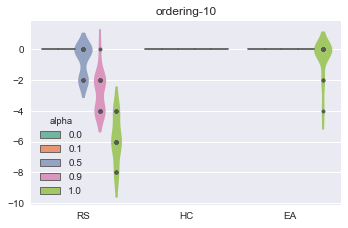

writing to  ordering-20


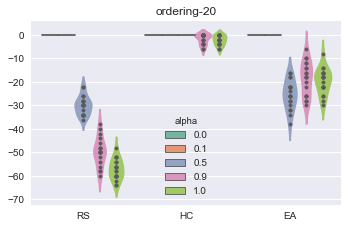

writing to  ordering-40


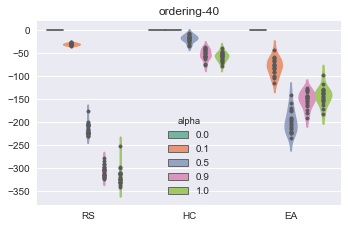

writing to  ordering-80


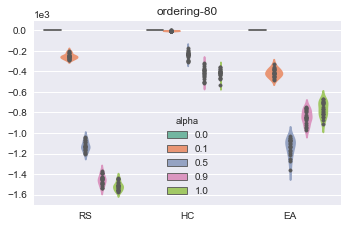

writing to  ordering-160


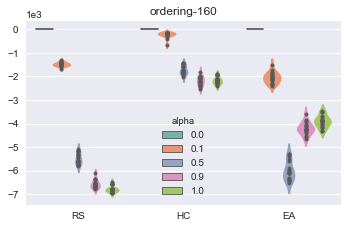

writing to  ordering-320


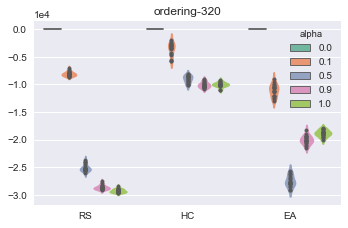

writing to  abz5


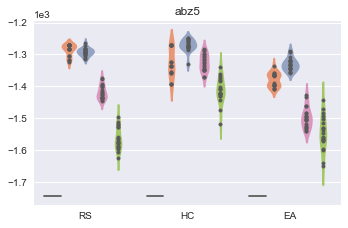

writing to  abz6


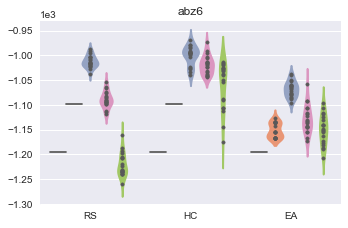

writing to  abz7


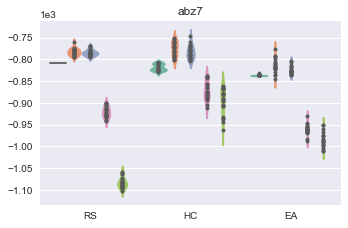

writing to  abz8


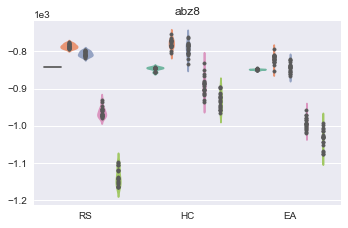

writing to  abz9


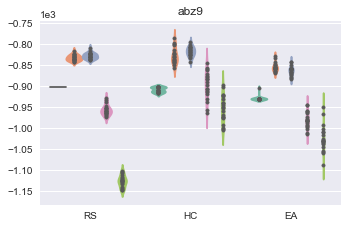

writing to  yn1


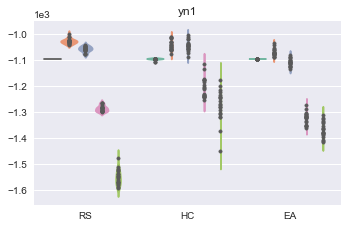

writing to  knapsack-rnd-10


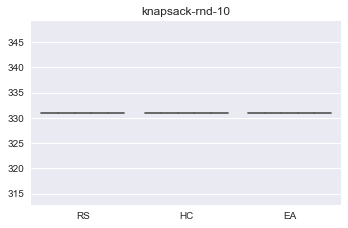

writing to  knapsack-rnd-20


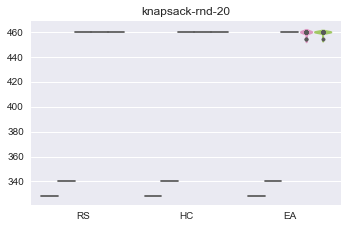

writing to  knapsack-rnd-40


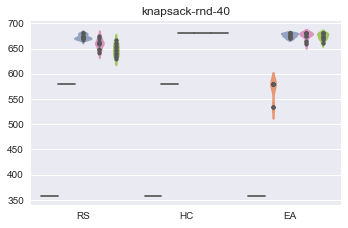

writing to  knapsack-rnd-80


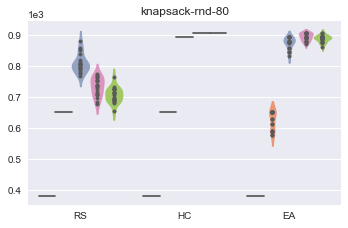

writing to  knapsack-rnd-160


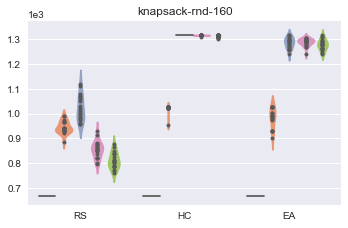

writing to  knapsack-rnd-320


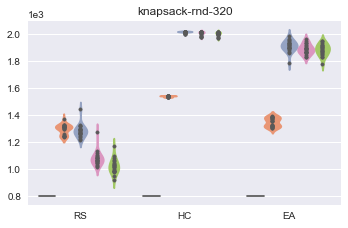

writing to  att48


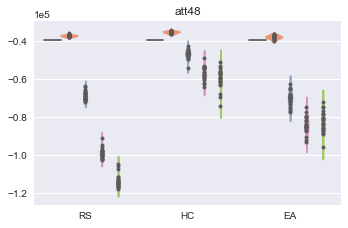

writing to  berlin52


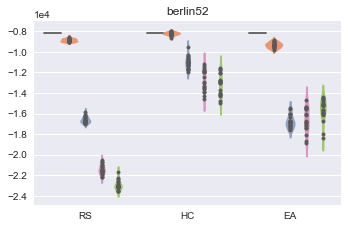

writing to  eil101


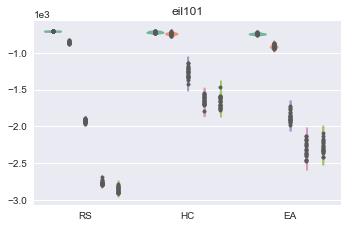

writing to  u159


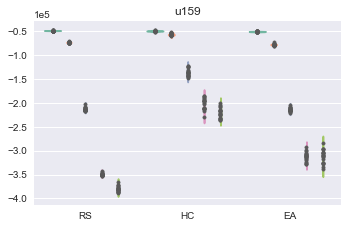

writing to  a280


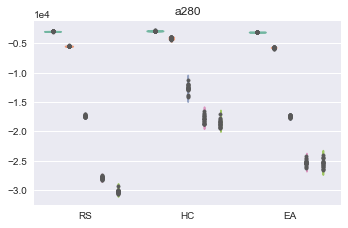

writing to  rat575


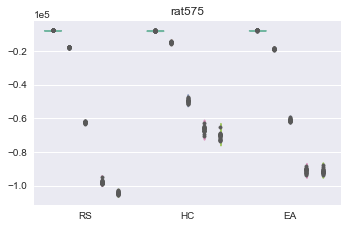

In [186]:
make_legend = True
for problem in problems:
    for i, inst in enumerate(instances[problem]):
        dtmp = d[(d["instance"] == inst) & (d["strong_reuse"] == True)]
        #dtmp = dtmp.assign(Generator=dtmp.generator.map(gen_name)) 
        #dtmp = [dtmp[(d["solver"] == solver) & (d["generator"] == generator)]["obj"] for solver in solvers for generator in generators]
        sns.violinplot(x="solver", hue="alpha", y="obj", data=dtmp, order=solvers, inner="points",
                      palette=sns.color_palette("Set2", 10))
    
        plt.ylabel("")
        #labels = ["%s, %s" % (solver, gen_name[generator]) for solver in solvers for generator in generators]
        title = map_inst_name(inst)
        plt.title(title)
        fig = plt.gcf()
        fig.set_size_inches(5, 3.33)
        ax = plt.gca()
        ax.set_xlabel("")
        #fmt = FormatStrFormatter('%1.1f')
        #fmt.use_offset(True)
        #ax.yaxis.set_major_formatter(fmt)
        #ax.get_yaxis().get_major_formatter().set_useOffset(True)
        #locater = MaxNLocator(nbins=4)
        #ax.yaxis.set_major_locator(locater)
        fmt = ScalarFormatter()
        fmt.set_powerlimits((-3, 3))
        ax.yaxis.set_major_formatter(fmt)
        #ax.get_yaxis().ticklabel_format(useOffset=False)
        if not make_legend:
            plt.gca().legend().remove()
        plt.tight_layout()
        print("writing to ", title)
        plt.savefig("img/strong_reuse_solver_by_alpha/%s.pdf" % title)
        plt.show()
        plt.close()
    make_legend = False
    

Next, we choose just the HC solver, and compare $\alpha$ and the strong re-use method versus weak re-use. The strong re-use is strictly better (more data to come for some cases).

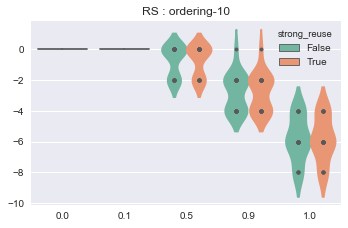

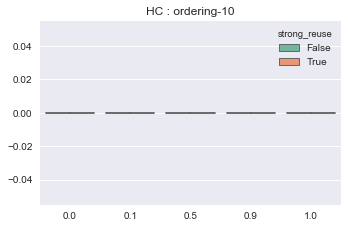

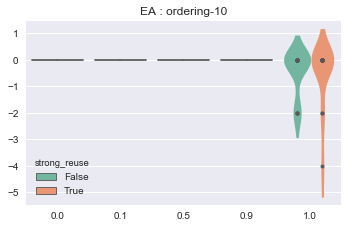

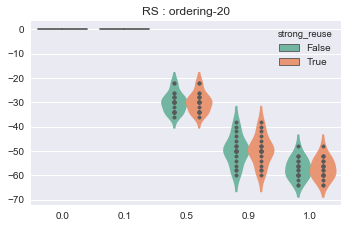

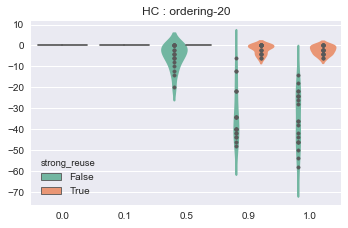

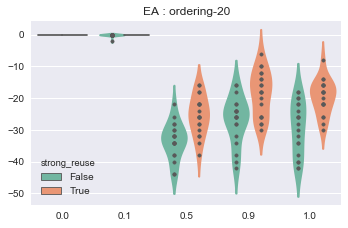

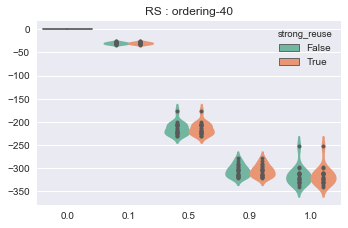

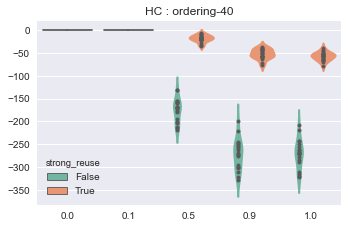

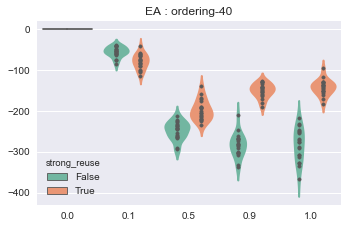

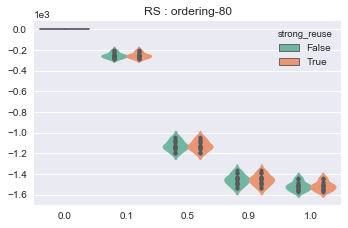

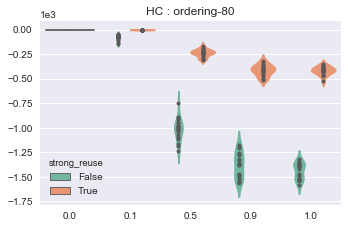

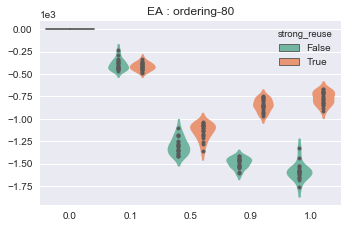

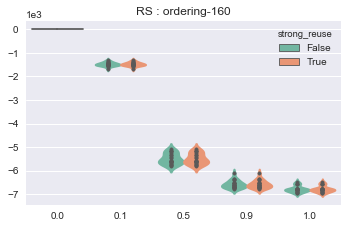

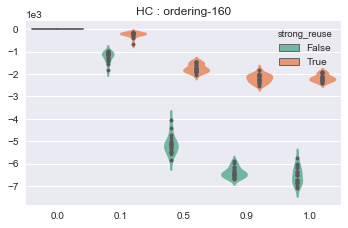

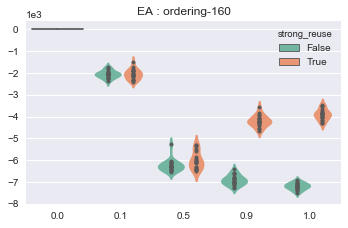

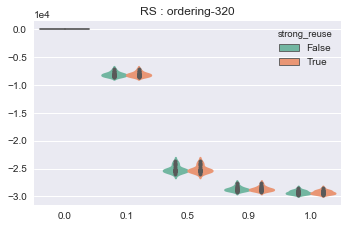

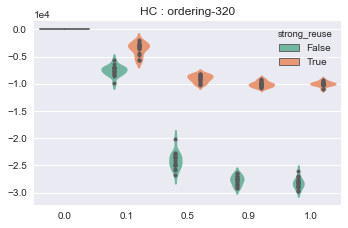

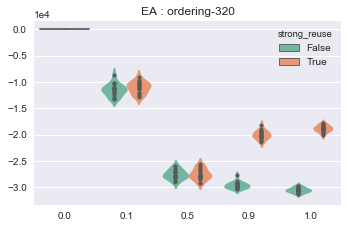

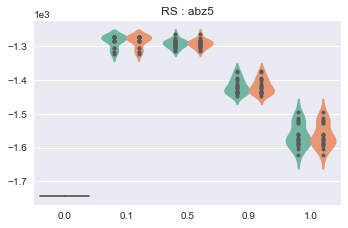

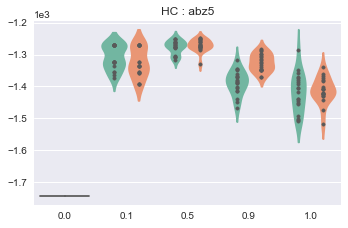

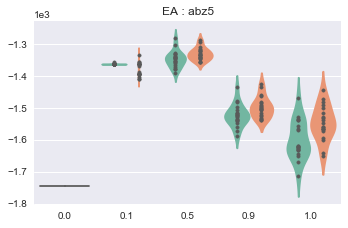

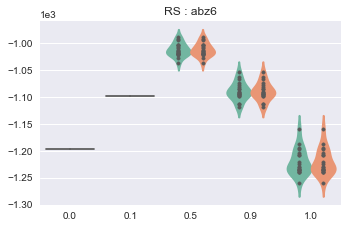

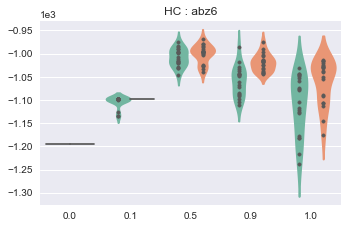

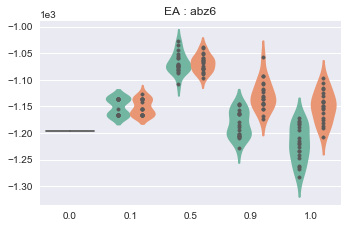

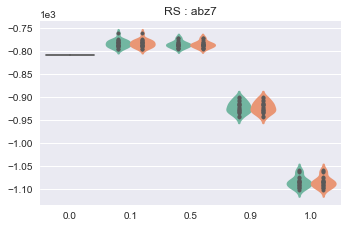

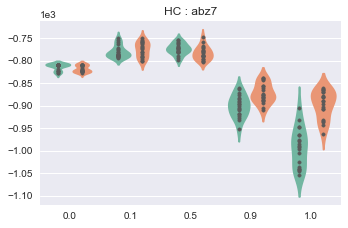

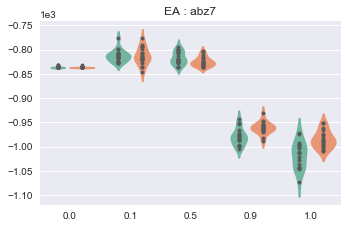

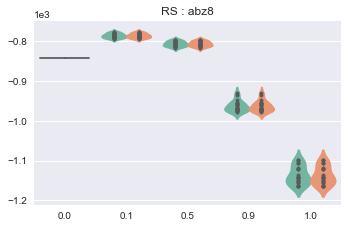

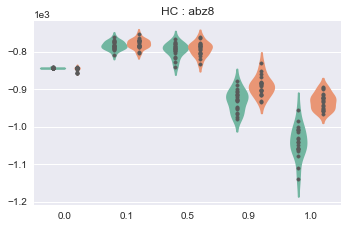

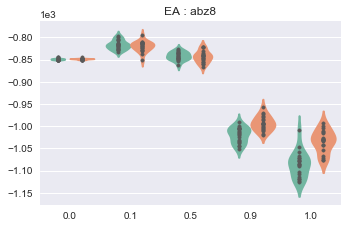

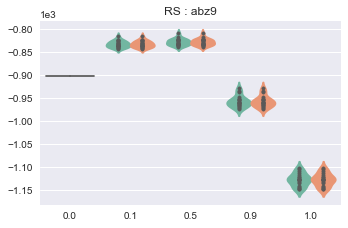

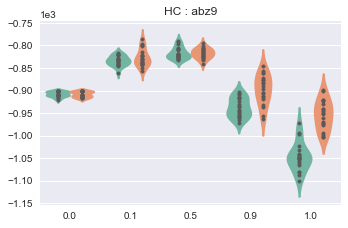

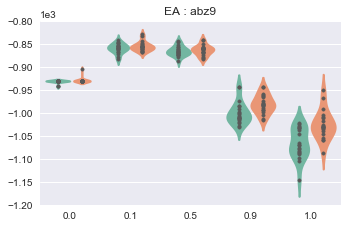

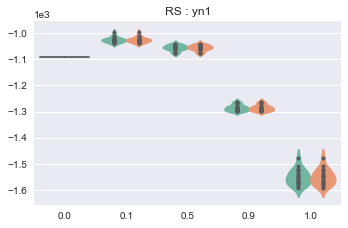

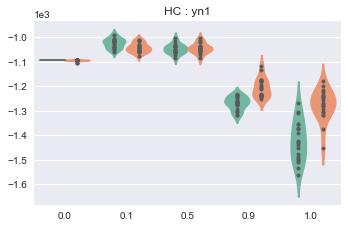

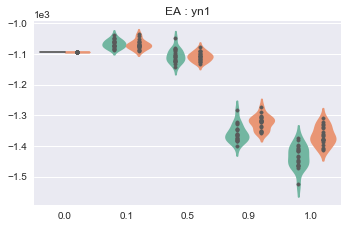

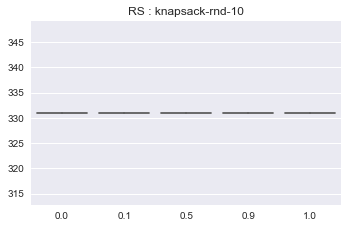

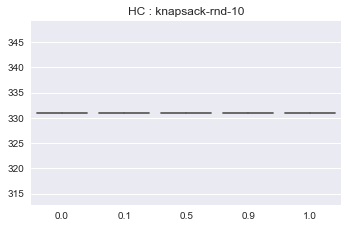

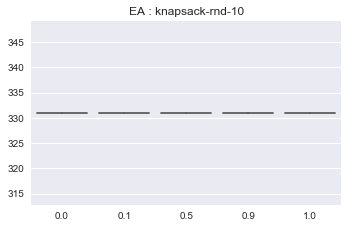

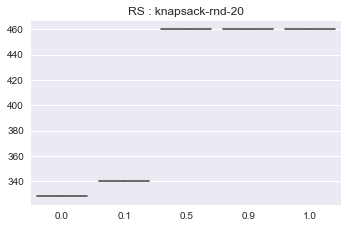

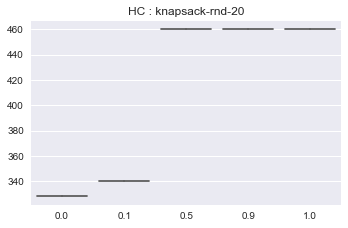

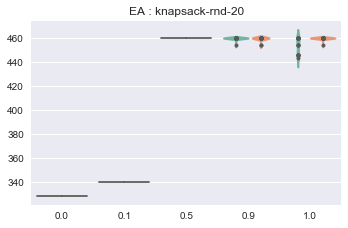

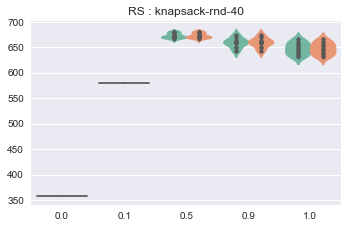

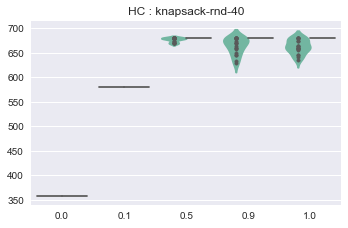

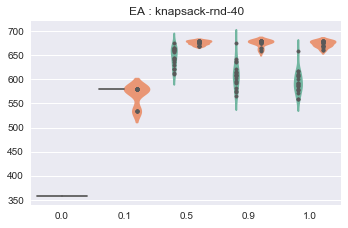

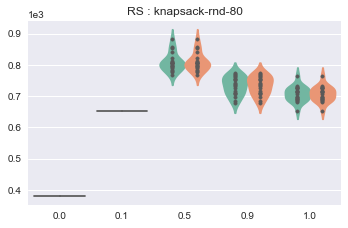

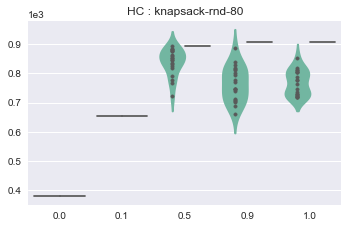

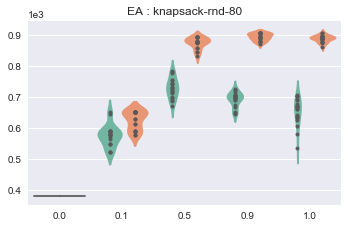

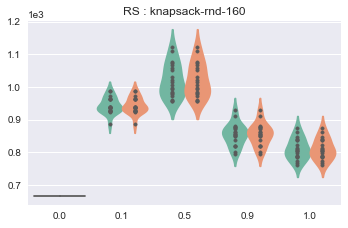

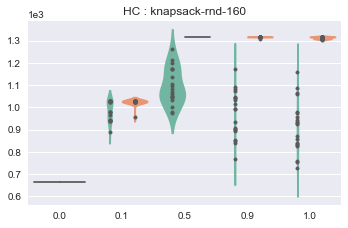

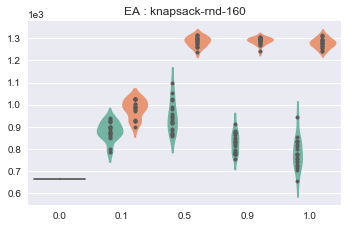

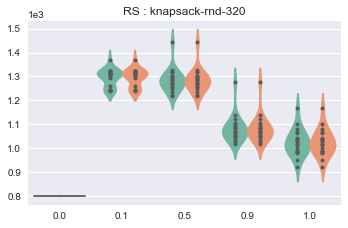

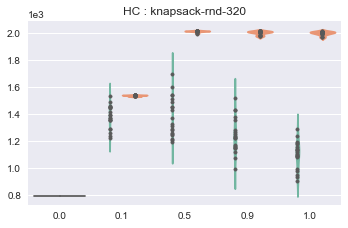

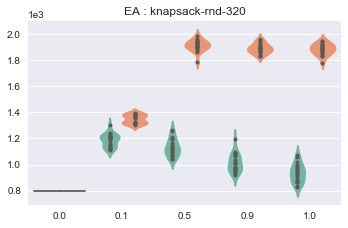

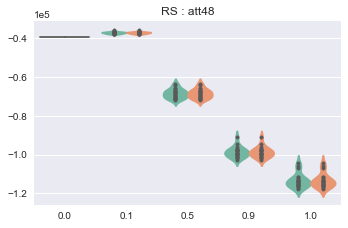

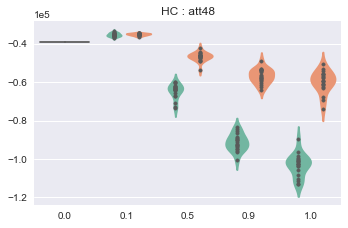

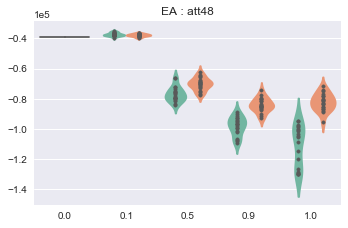

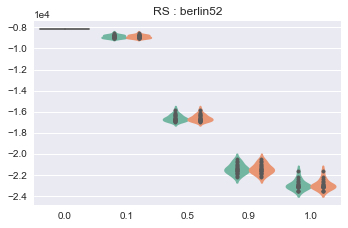

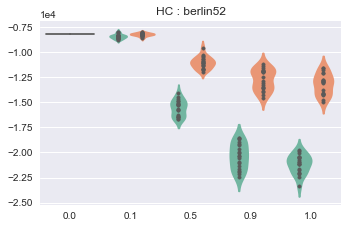

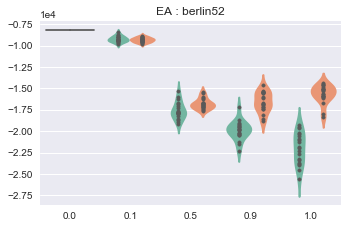

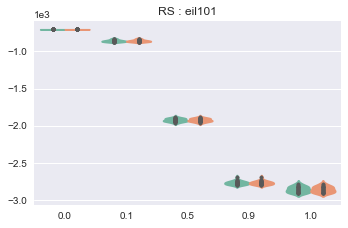

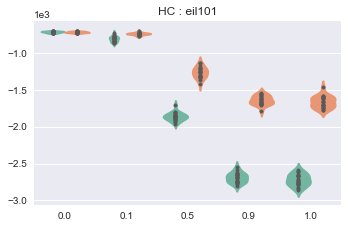

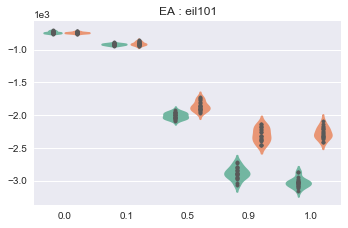

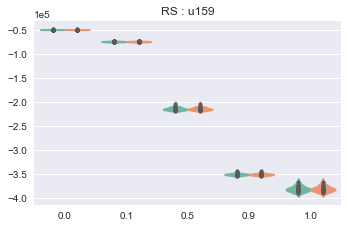

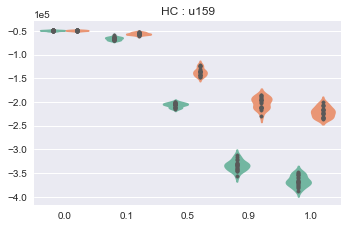

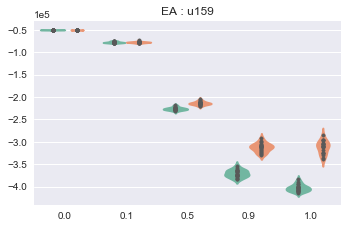

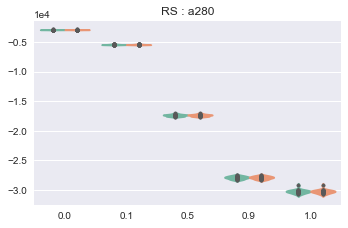

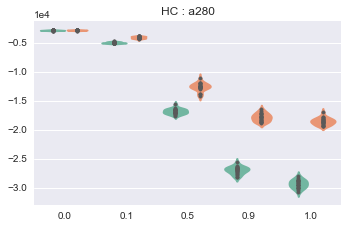

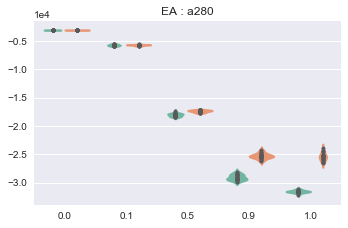

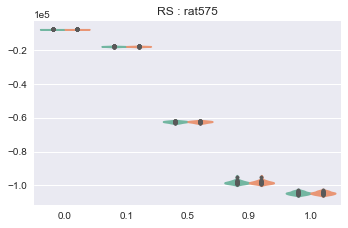

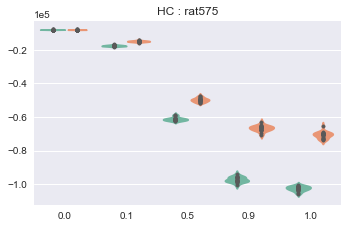

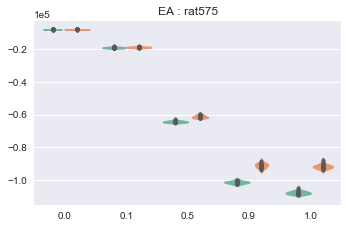

In [187]:
make_legend = True
for problem in problems:
    for i, inst in enumerate(instances[problem]):
        for solver in solvers:
            dtmp = d[(d["instance"] == inst) & (d["solver"] == solver)]
            #dtmp = dtmp.assign(Generator=dtmp.generator.map(gen_name)) 
            #dtmp = [dtmp[(d["solver"] == solver) & (d["generator"] == generator)]["obj"] for solver in solvers for generator in generators]
            sns.violinplot(x="alpha", hue="strong_reuse", y="obj", data=dtmp,  inner="points",
                          palette=sns.color_palette("Set2", 10))

            plt.ylabel("")
            title = solver + " : " + map_inst_name(inst)
            plt.title(title)
            fig = plt.gcf()
            fig.set_size_inches(5, 3.33)
            ax = plt.gca()
            ax.set_xlabel("")
            #fmt = FormatStrFormatter('%1.1f')
            #fmt.use_offset(True)
            #ax.yaxis.set_major_formatter(fmt)
            #ax.get_yaxis().get_major_formatter().set_useOffset(True)
            #locater = MaxNLocator(nbins=4)
            #ax.yaxis.set_major_locator(locater)
            fmt = ScalarFormatter()
            fmt.set_powerlimits((-3, 3))
            ax.yaxis.set_major_formatter(fmt)
            #ax.get_yaxis().ticklabel_format(useOffset=False) 
            if not make_legend:
                plt.gca().legend().remove()
            plt.tight_layout()
            plt.savefig("img/strong_reuse_by_alpha/%s.pdf" % title.replace(" : ", "_"))
            plt.show()
            plt.close()
    make_legend = False


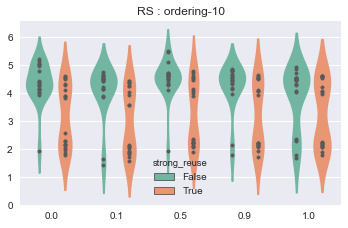

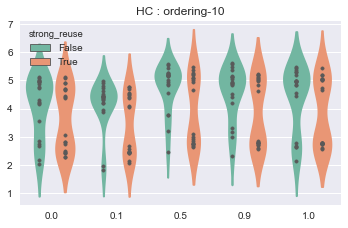

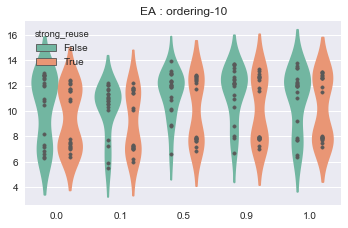

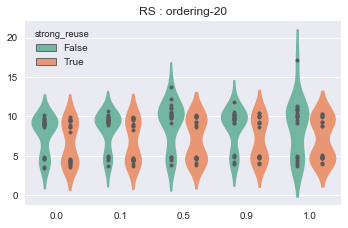

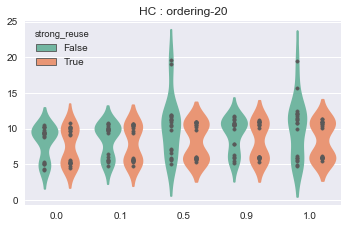

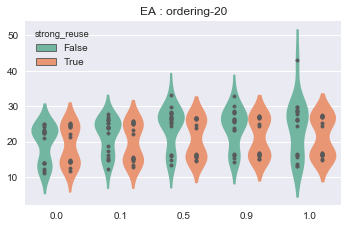

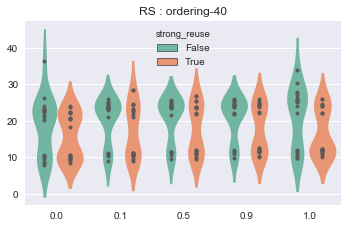

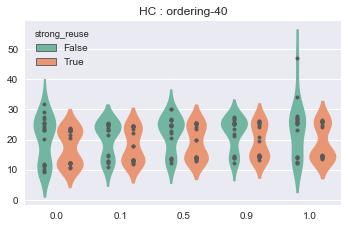

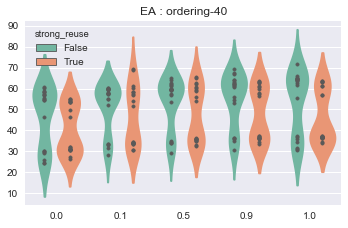

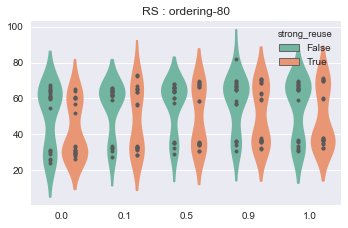

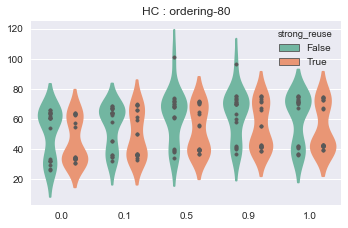

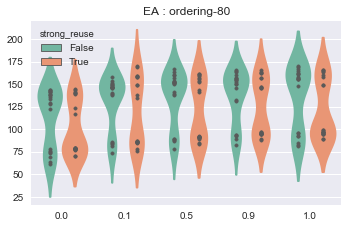

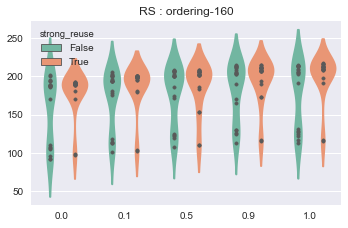

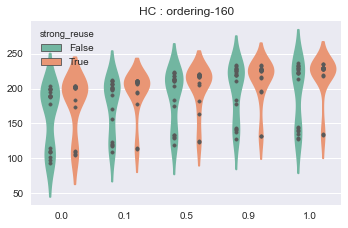

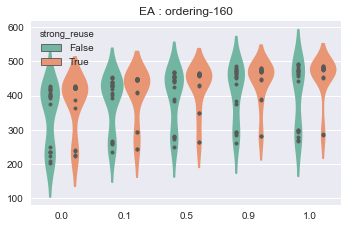

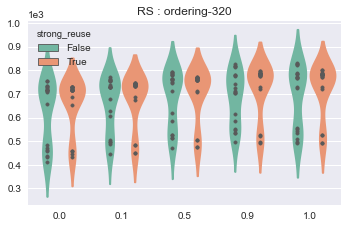

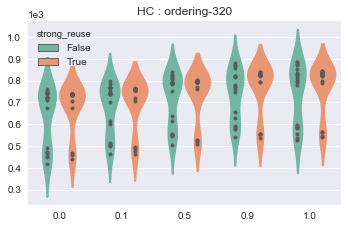

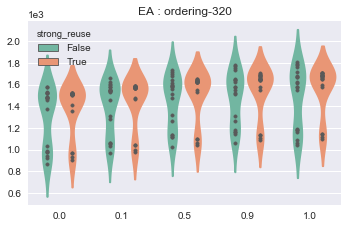

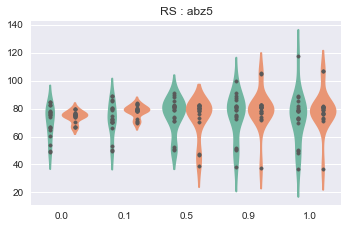

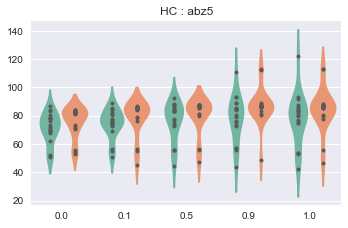

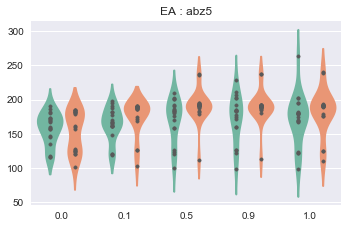

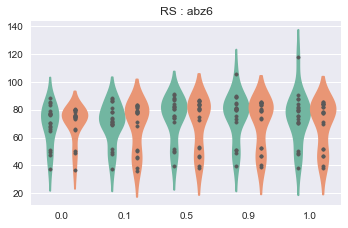

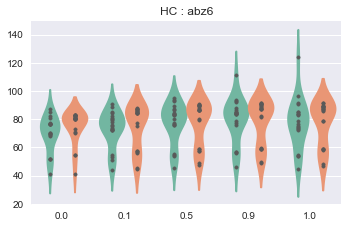

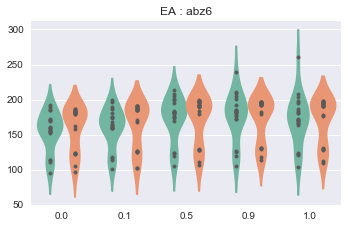

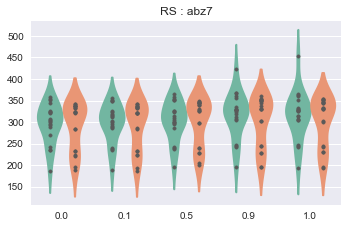

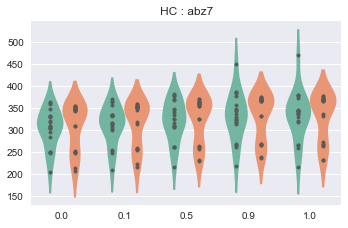

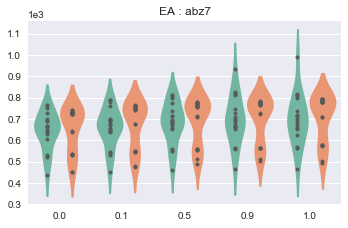

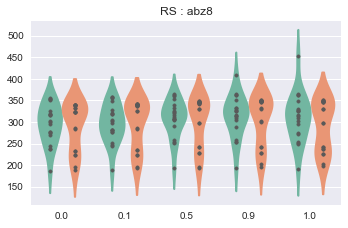

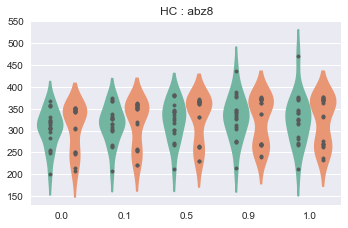

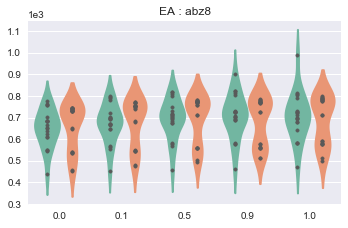

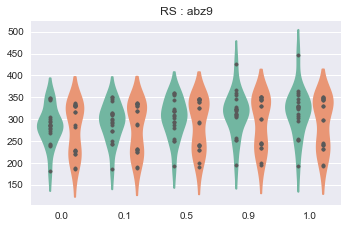

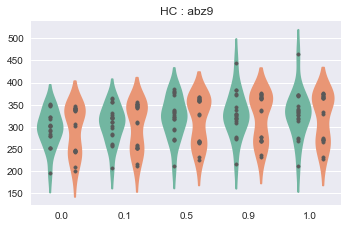

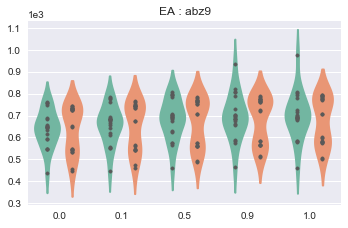

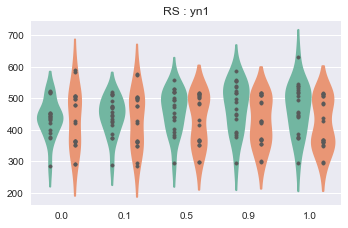

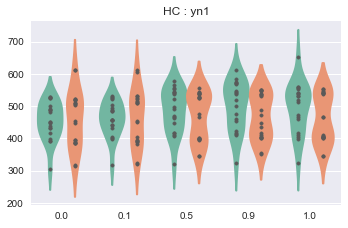

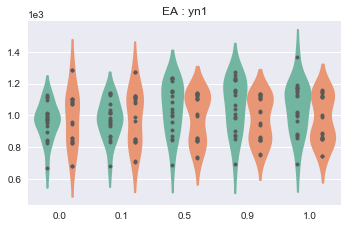

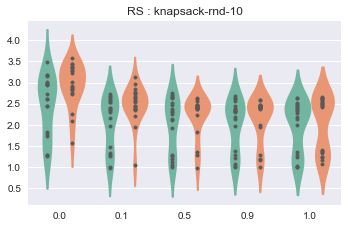

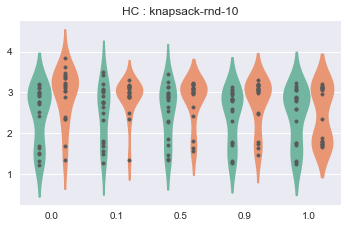

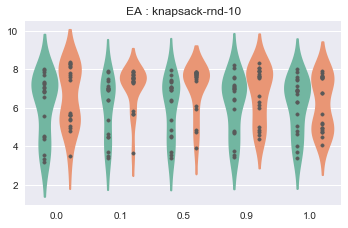

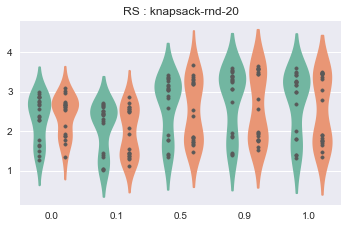

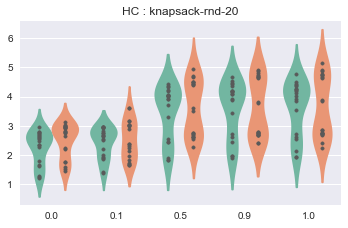

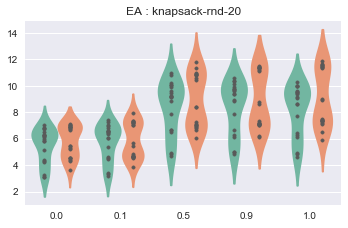

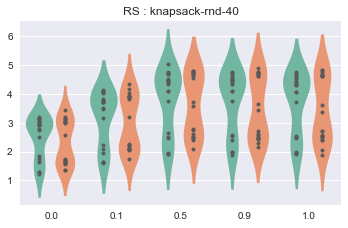

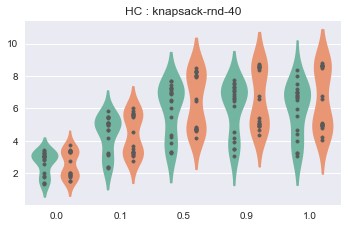

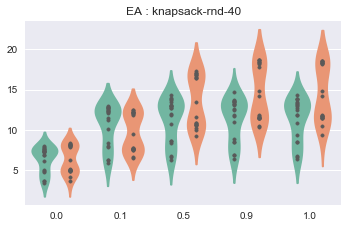

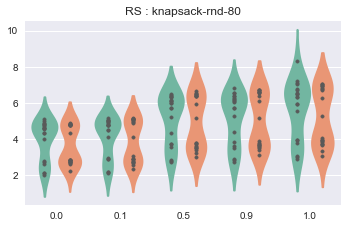

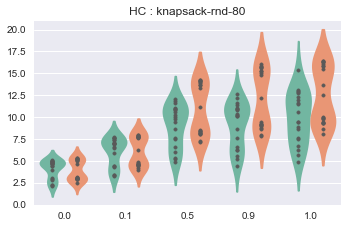

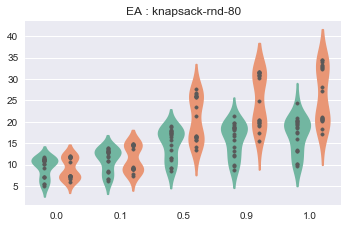

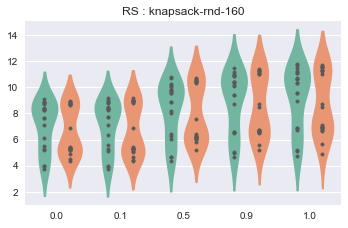

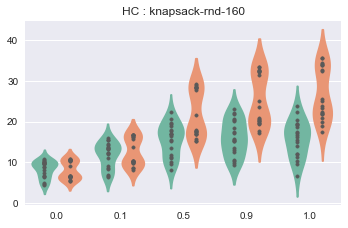

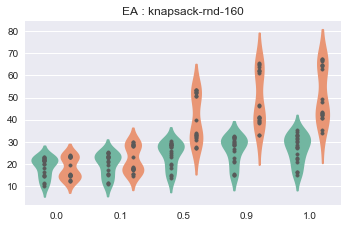

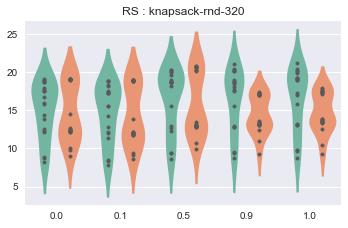

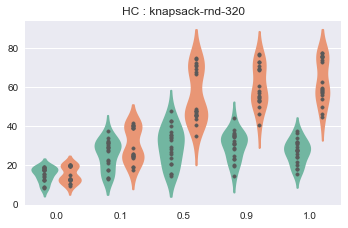

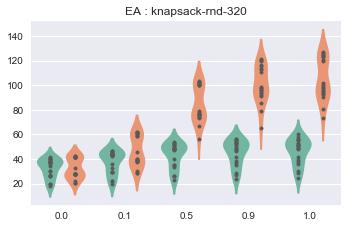

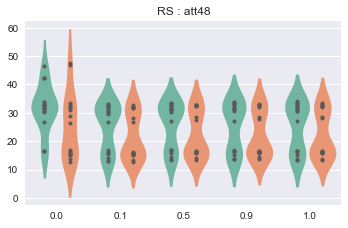

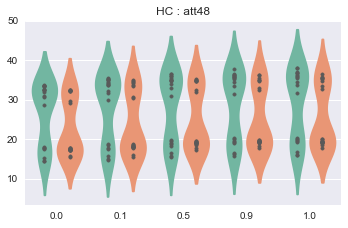

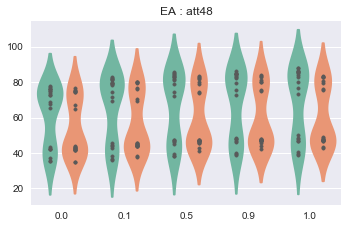

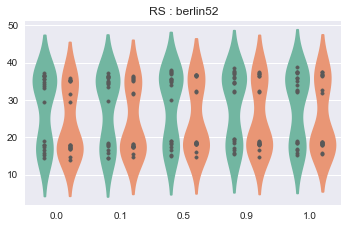

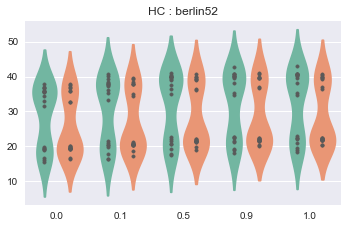

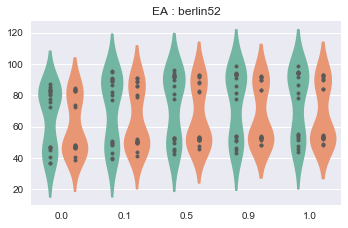

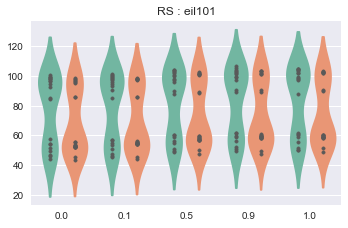

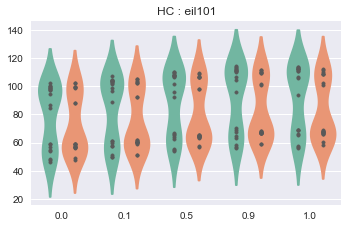

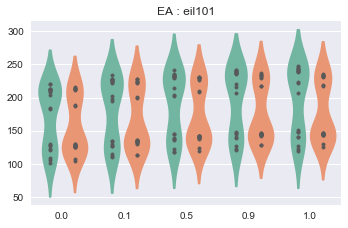

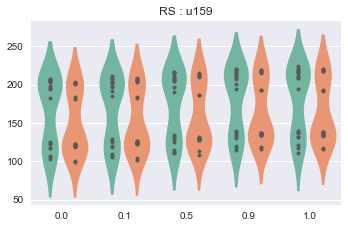

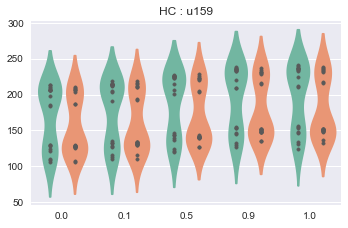

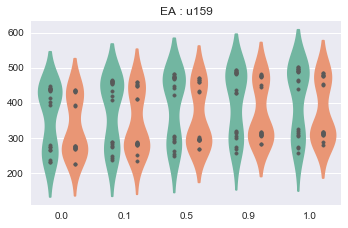

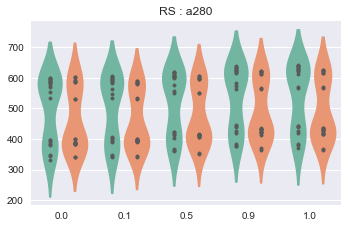

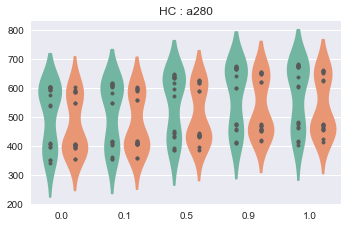

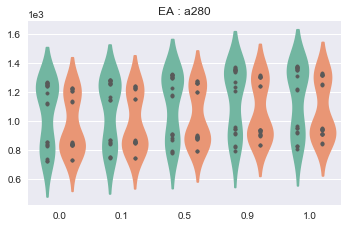

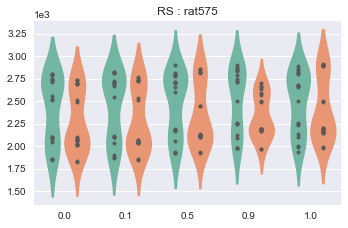

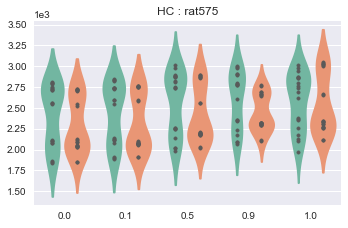

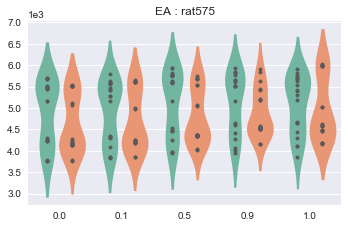

In [188]:
make_legend = True
for problem in problems:
    for i, inst in enumerate(instances[problem]):
        for solver in solvers:
            dtmp = d[(d["instance"] == inst) & (d["solver"] == solver)]
            #dtmp = dtmp.assign(Generator=dtmp.generator.map(gen_name)) 
            #dtmp = [dtmp[(d["solver"] == solver) & (d["generator"] == generator)]["obj"] for solver in solvers for generator in generators]
            sns.violinplot(x="alpha", hue="strong_reuse", y="elapsed_time", data=dtmp,  inner="points",
                          palette=sns.color_palette("Set2", 10))

            plt.ylabel("")
            title = solver + " : " + map_inst_name(inst)
            plt.title(title)
            fig = plt.gcf()
            fig.set_size_inches(5, 3.33)
            ax = plt.gca()
            ax.set_xlabel("")
            #fmt = FormatStrFormatter('%1.1f')
            #fmt.use_offset(True)
            #ax.yaxis.set_major_formatter(fmt)
            #ax.get_yaxis().get_major_formatter().set_useOffset(True)
            #locater = MaxNLocator(nbins=4)
            #ax.yaxis.set_major_locator(locater)
            fmt = ScalarFormatter()
            fmt.set_powerlimits((-3, 3))
            ax.yaxis.set_major_formatter(fmt)
            #ax.get_yaxis().ticklabel_format(useOffset=False) 
            if not make_legend:
                plt.gca().legend().remove()
            plt.tight_layout()
            plt.savefig("img/time_strong_reuse_by_alpha/%s.pdf" % title.replace(" : ", "_"))
            plt.show()
            plt.close()
    make_legend = False


In [102]:
print(r"Problem & Instance & Size & Solver & Re-use & $\alpha$ & Obj & Time (s)\\")
print(r"\hline\\")
for problem in problems:
    for inst in instances[problem]:
        for solver in solvers:
            for reuse in strong_reuse_vals:
                for alpha in alpha_vals:
                    dtmp = d[(d["instance"] == inst) & 
                             (d["solver"] == solver) &
                             (d["strong_reuse"] == reuse) &
                             (d["alpha"] == alpha)]
                    size = list(set(dtmp["size"].values))[0] # constant in dtmp
                    
                    #print("   \multicolumn{2}{|c}{%s} & " % inst.split(".")[0], end="")
                    #print(r"\\")
                    #print(r"\hline")
                    reuse_name = "Strong" if reuse else "Weak"
                    meanv = dtmp["obj"].mean()
                    stdv = dtmp["obj"].std()
                    timev = dtmp["elapsed_time"].mean()
                    print(r"%s & %s & %d & %s & %s & %.1f & %.0f & %.0f & %.0f\\" % (
                        problem, map_inst_name(inst), size, solver, reuse_name, alpha, meanv, stdv, timev
                    ))


Problem & Instance & Size & Solver & Re-use & $\alpha$ & Obj $ Time (s)\\
\hline\\
ORDERING & ordering-10 & 10 & RS & Weak & 0.0 & 0 & 0 & 4\\
ORDERING & ordering-10 & 10 & RS & Weak & 0.1 & 0 & 0 & 4\\
ORDERING & ordering-10 & 10 & RS & Weak & 0.5 & -1 & 1 & 5\\
ORDERING & ordering-10 & 10 & RS & Weak & 0.9 & -3 & 1 & 4\\
ORDERING & ordering-10 & 10 & RS & Weak & 1.0 & -6 & 1 & 4\\
ORDERING & ordering-10 & 10 & RS & Strong & 0.0 & 0 & 0 & 3\\
ORDERING & ordering-10 & 10 & RS & Strong & 0.1 & 0 & 0 & 3\\
ORDERING & ordering-10 & 10 & RS & Strong & 0.5 & -1 & 1 & 3\\
ORDERING & ordering-10 & 10 & RS & Strong & 0.9 & -3 & 1 & 3\\
ORDERING & ordering-10 & 10 & RS & Strong & 1.0 & -6 & 1 & 3\\
ORDERING & ordering-10 & 10 & HC & Weak & 0.0 & 0 & 0 & 4\\
ORDERING & ordering-10 & 10 & HC & Weak & 0.1 & 0 & 0 & 4\\
ORDERING & ordering-10 & 10 & HC & Weak & 0.5 & 0 & 0 & 5\\
ORDERING & ordering-10 & 10 & HC & Weak & 0.9 & 0 & 0 & 5\\
ORDERING & ordering-10 & 10 & HC & Weak & 1.0 & 0 & 0 & 4\\
O

ORDERING & ordering-160 & 160 & EA & Strong & 1.0 & -3902 & 247 & 458\\
ORDERING & ordering-320 & 320 & RS & Weak & 0.0 & 0 & 0 & 627\\
ORDERING & ordering-320 & 320 & RS & Weak & 0.1 & -8058 & 391 & 664\\
ORDERING & ordering-320 & 320 & RS & Weak & 0.5 & -25102 & 614 & 686\\
ORDERING & ordering-320 & 320 & RS & Weak & 0.9 & -28622 & 391 & 689\\
ORDERING & ordering-320 & 320 & RS & Weak & 1.0 & -29234 & 314 & 694\\
ORDERING & ordering-320 & 320 & RS & Strong & 0.0 & 0 & 0 & 662\\
ORDERING & ordering-320 & 320 & RS & Strong & 0.1 & -8036 & 393 & 679\\
ORDERING & ordering-320 & 320 & RS & Strong & 0.5 & -25048 & 624 & 704\\
ORDERING & ordering-320 & 320 & RS & Strong & 0.9 & -28583 & 389 & 724\\
ORDERING & ordering-320 & 320 & RS & Strong & 1.0 & -29200 & 310 & 723\\
ORDERING & ordering-320 & 320 & HC & Weak & 0.0 & 0 & 0 & 635\\
ORDERING & ordering-320 & 320 & HC & Weak & 0.1 & -7522 & 900 & 676\\
ORDERING & ordering-320 & 320 & HC & Weak & 0.5 & -24088 & 1444 & 719\\
ORDERING & orderin

JSSP & abz9 & 20 & HC & Weak & 1.0 & -1046 & 32 & 330\\
JSSP & abz9 & 20 & HC & Strong & 0.0 & -908 & 6 & 295\\
JSSP & abz9 & 20 & HC & Strong & 0.1 & -827 & 19 & 303\\
JSSP & abz9 & 20 & HC & Strong & 0.5 & -817 & 11 & 317\\
JSSP & abz9 & 20 & HC & Strong & 0.9 & -897 & 33 & 323\\
JSSP & abz9 & 20 & HC & Strong & 1.0 & -954 & 32 & 322\\
JSSP & abz9 & 20 & EA & Weak & 0.0 & -931 & 4 & 640\\
JSSP & abz9 & 20 & EA & Weak & 0.1 & -859 & 11 & 659\\
JSSP & abz9 & 20 & EA & Weak & 0.5 & -865 & 11 & 683\\
JSSP & abz9 & 20 & EA & Weak & 0.9 & -999 & 24 & 697\\
JSSP & abz9 & 20 & EA & Weak & 1.0 & -1065 & 33 & 701\\
JSSP & abz9 & 20 & EA & Strong & 0.0 & -929 & 6 & 639\\
JSSP & abz9 & 20 & EA & Strong & 0.1 & -854 & 10 & 653\\
JSSP & abz9 & 20 & EA & Strong & 0.5 & -863 & 11 & 672\\
JSSP & abz9 & 20 & EA & Strong & 0.9 & -980 & 20 & 682\\
JSSP & abz9 & 20 & EA & Strong & 1.0 & -1025 & 32 & 679\\
JSSP & yn1 & 20 & RS & Weak & 0.0 & -1093 & 0 & 439\\
JSSP & yn1 & 20 & RS & Weak & 0.1 & -1025 & 10

KNAPSACK & knapsack-rnd-80 & 80 & HC & Strong & 0.0 & 379 & 0 & 4\\
KNAPSACK & knapsack-rnd-80 & 80 & HC & Strong & 0.1 & 653 & 0 & 6\\
KNAPSACK & knapsack-rnd-80 & 80 & HC & Strong & 0.5 & 894 & 0 & 11\\
KNAPSACK & knapsack-rnd-80 & 80 & HC & Strong & 0.9 & 907 & 0 & 12\\
KNAPSACK & knapsack-rnd-80 & 80 & HC & Strong & 1.0 & 907 & 0 & 13\\
KNAPSACK & knapsack-rnd-80 & 80 & EA & Weak & 0.0 & 379 & 0 & 10\\
KNAPSACK & knapsack-rnd-80 & 80 & EA & Weak & 0.1 & 575 & 35 & 11\\
KNAPSACK & knapsack-rnd-80 & 80 & EA & Weak & 0.5 & 730 & 32 & 15\\
KNAPSACK & knapsack-rnd-80 & 80 & EA & Weak & 0.9 & 693 & 23 & 16\\
KNAPSACK & knapsack-rnd-80 & 80 & EA & Weak & 1.0 & 654 & 44 & 17\\
KNAPSACK & knapsack-rnd-80 & 80 & EA & Strong & 0.0 & 379 & 0 & 10\\
KNAPSACK & knapsack-rnd-80 & 80 & EA & Strong & 0.1 & 633 & 27 & 12\\
KNAPSACK & knapsack-rnd-80 & 80 & EA & Strong & 0.5 & 876 & 15 & 21\\
KNAPSACK & knapsack-rnd-80 & 80 & EA & Strong & 0.9 & 896 & 11 & 26\\
KNAPSACK & knapsack-rnd-80 & 80 & EA & 

TSP & eil101 & 101 & EA & Strong & 0.1 & -908 & 24 & 162\\
TSP & eil101 & 101 & EA & Strong & 0.5 & -1859 & 72 & 168\\
TSP & eil101 & 101 & EA & Strong & 0.9 & -2298 & 109 & 172\\
TSP & eil101 & 101 & EA & Strong & 1.0 & -2282 & 88 & 172\\
TSP & u159 & 159 & RS & Weak & 0.0 & -48204 & 215 & 167\\
TSP & u159 & 159 & RS & Weak & 0.1 & -73070 & 861 & 168\\
TSP & u159 & 159 & RS & Weak & 0.5 & -212884 & 3422 & 174\\
TSP & u159 & 159 & RS & Weak & 0.9 & -349633 & 2461 & 179\\
TSP & u159 & 159 & RS & Weak & 1.0 & -379901 & 5918 & 180\\
TSP & u159 & 159 & RS & Strong & 0.0 & -48221 & 220 & 146\\
TSP & u159 & 159 & RS & Strong & 0.1 & -72986 & 865 & 149\\
TSP & u159 & 159 & RS & Strong & 0.5 & -212556 & 3450 & 155\\
TSP & u159 & 159 & RS & Strong & 0.9 & -349841 & 2327 & 161\\
TSP & u159 & 159 & RS & Strong & 1.0 & -380402 & 4908 & 161\\
TSP & u159 & 159 & HC & Weak & 0.0 & -49103 & 810 & 170\\
TSP & u159 & 159 & HC & Weak & 0.1 & -65927 & 2958 & 176\\
TSP & u159 & 159 & HC & Weak & 0.5 & -206

In [174]:
def map_inst_name2(s):
    if s.startswith("ordering") or s.startswith("knapsack"): return s.split("-")[-1]
    else:
        return s

# A table with only HC and alpha=0.5
ofilename = "/Users/jmmcd/Dropbox/trace climber/PTO_papers/evocop2019/results_table.tex"
ofile = open(ofilename, "w")

write_inst = True
ofile.write(r"\begin{table}")
ofile.write("\n")
solvers = ["HC"]
alpha_vals = [0.5]
for problem in problems:
    ofile.write(r"""
\begin{subtable}[b]{.5\linewidth}
\begin{tabular}{ll|rrr}
""")
    ofile.write(r"\multicolumn{7}{c}{%s}\\ " % problem)
    ofile.write("\n")
    ofile.write(r"\hline")
    ofile.write("\n")
    ofile.write(r"Inst. & Obj. & (std) & Time\\")
    ofile.write("\n")
    ofile.write(r"\hline\\")
    ofile.write("\n")
    for inst in instances[problem]:
        for solver in solvers:
            for reuse in strong_reuse_vals:
                for alpha in alpha_vals:
                    dtmp = d[(d["instance"] == inst) & 
                             (d["solver"] == solver) &
                             (d["strong_reuse"] == reuse) &
                             (d["alpha"] == alpha)]
                    size = list(set(dtmp["size"].values))[0] # constant in dtmp
                    
                    reuse_name = "Strong" if reuse else "Weak"
                    meanv = dtmp["obj"].mean()
                    stdv = dtmp["obj"].std()
                    timev = dtmp["elapsed_time"].mean()
                    inst_str = map_inst_name2(inst) if write_inst else ""
                    ofile.write(r"%s & %s & %.0f & %.0f & %.0f\\" % (
                        inst_str, reuse_name, meanv, stdv, timev
                    ))
                    ofile.write("\n")
                    write_inst = not write_inst
    ofile.write(r"""
\end{tabular}
\end{subtable}""")
ofile.write(r"""
\caption{Test}
\end{table}""")
ofile.close()

In [175]:
def map_inst_name2(s):
    if s.startswith("ordering") or s.startswith("knapsack"): return s.split("-")[-1]
    else:
        return s

# A table with only HC and alpha=0.5
ofilename = "/Users/jmmcd/Dropbox/trace climber/PTO_papers/evocop2019/results_table.tex"
ofile = open(ofilename, "w")

write_inst = True
ofile.write(r"""\begin{table}
\footnotesize""")
ofile.write("\n")
solvers = ["HC"]
alpha_vals = [0.5]
for problem in problems:
    ofile.write(r"""
\begin{subtable}[b]{.5\linewidth}
\begin{tabular}{l|rrr|rrr}
""")
    ofile.write(r"\multicolumn{7}{c}{%s} \\" % problem.title())
    ofile.write(r" & \multicolumn{3}{c}{Weak} & \multicolumn{3}{c}{Strong}\\ ")
    ofile.write("\n")
    ofile.write(r"\hline")
    ofile.write("\n")
    ofile.write(r"Inst. & Obj. & (std) & Time & Obj. & (std) & Time\\")
    ofile.write("\n")
    ofile.write(r"\hline\\")
    ofile.write("\n")
    for inst in instances[problem]:
        for solver in solvers:
            for reuse in strong_reuse_vals:
                for alpha in alpha_vals:
                    dtmp = d[(d["instance"] == inst) & 
                             (d["solver"] == solver) &
                             (d["strong_reuse"] == reuse) &
                             (d["alpha"] == alpha)]
                    size = list(set(dtmp["size"].values))[0] # constant in dtmp
                    
                    reuse_name = "Strong" if reuse else "Weak"
                    meanv = dtmp["obj"].mean()
                    stdv = dtmp["obj"].std()
                    timev = dtmp["elapsed_time"].mean()
                    inst_str = map_inst_name2(inst) if write_inst else ""
                    if write_inst:
                        ofile.write(r"%s & %.0f & %.0f & %.0f" % (
                            inst_str, meanv, stdv, timev
                        ))
                    else:
                        ofile.write(r" & %.0f & %.0f & %.0f\\" % (
                            meanv, stdv, timev
                        ))
                    ofile.write("\n")
                    write_inst = not write_inst
    ofile.write(r"""
\end{tabular}
\end{subtable}""")
ofile.write(r"""
\caption{Test}
\end{table}""")
ofile.close()

In [177]:
def map_inst_name2(s):
    if s.startswith("ordering") or s.startswith("knapsack"): return s.split("-")[-1]
    else:
        return s
def map_prob_name(s):
    if s in ["JSSP", "TSP"]: return s
    else: return s.title()

# A table with only HC and alpha=0.5
ofilename = "/Users/jmmcd/Dropbox/trace climber/PTO_papers/evocop2019/results_table_HC.tex"
ofile = open(ofilename, "w")

write_inst = True
ofile.write(r"""\begin{SCtable}
\footnotesize
\caption{Problem (instance), mean objective value and standard deviation, and elapsed time (in seconds), 
for weak and strong re-use methods. Results are shown for the HC metaheuristic and $\alpha=0.5$ only. 
For all problems, higher is better (closer to zero, for negative values.)
\label{tab:results}}
""")
#ofile.write("\n")
ofile.write(r"""
\begin{tabular}{l|rlr|rlr}
 & \multicolumn{3}{c|}{Weak reuse} & \multicolumn{3}{c}{Strong reuse}\\
Inst. & Obj. & {\scriptsize sd} & T(s) & Obj. & {\scriptsize sd} & T(s)\\
""" )

write_inst = True
solvers = ["HC"]
alpha_vals = [0.5]

for problem in problems:
    ofile.write("\hline")
    ofile.write("\n")
    ofile.write(r""" \multicolumn{7}{c}{{\bf %s}} \\""" % map_prob_name(problem))
    ofile.write("\n")
    ofile.write("\hline")
    ofile.write("\n")
    for inst in instances[problem]:
        for solver in solvers:
            for reuse in strong_reuse_vals:
                for alpha in alpha_vals:
                    dtmp = d[(d["instance"] == inst) & 
                             (d["solver"] == solver) &
                             (d["strong_reuse"] == reuse) &
                             (d["alpha"] == alpha)]
                    size = list(set(dtmp["size"].values))[0] # constant in dtmp
                    
                    reuse_name = "Strong" if reuse else "Weak"
                    meanv = dtmp["obj"].mean()
                    stdv = dtmp["obj"].std()
                    timev = dtmp["elapsed_time"].mean()
                    inst_str = map_inst_name2(inst) if write_inst else ""
                    if write_inst:
                        ofile.write(r"%s " % (inst_str))

                    ofile.write(r" & %.0f & {\scriptsize %.0f} & %.0f" % (
                            meanv, stdv, timev
                    ))
                    if not write_inst: 
                        ofile.write(r"\\")
                        ofile.write("\n")
                    write_inst = not write_inst
ofile.write(r"""\end{tabular}
""")
ofile.write(r"""\end{SCtable}""")
ofile.close()